# Handwritten Number Recognition Using MLP

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.datasets import mnist
from keras.utils import np_utils
from sklearn.metrics import  confusion_matrix

D:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_image, train_target_column), (test_image, test_target_column) = mnist.load_data()

In [3]:
# 訓練集圖片60000張；測試集10000張

print('訓練集圖片個數: ', train_image.shape)
print('訓練集目標欄位行數: ', train_target_column.shape)
print('測試集圖片個數: ', test_image.shape)
print('測試集目標欄位行數: ',test_target_column.shape)

訓練集圖片個數:  (60000, 28, 28)
訓練集目標欄位行數:  (60000,)
測試集圖片個數:  (10000, 28, 28)
測試集目標欄位行數:  (10000,)


In [4]:
# 二維圖片轉一維 (28X28 = 784)
train_image_one_dimension = train_image.reshape(60000, 784).astype('float')
test_image_one_dimension = test_image.reshape(10000, 784).astype('float')

In [5]:
# 標準化，以利提升計算效率
train_image_normalized = train_image_one_dimension / 255
test_image_normalized = test_image_one_dimension / 255

In [6]:
# 將目標欄位轉為one hot encoder
train_one_hot = np_utils.to_categorical(train_target_column)
test_one_hot = np_utils.to_categorical(test_target_column)

In [14]:
# 建立多層感知器模型 (MLP)
MLP = Sequential()
MLP.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
MLP.add(Dropout(0.5))
MLP.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
MLP.add(Dropout(0.5))
MLP.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))


In [15]:
# 設定模型損失函數、最優化算法和評估預測結果的方式
MLP.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [16]:
# verbose=顯示訓練過程
# 數據擬合
trained_MLP = MLP.fit(train_image_normalized, train_one_hot, validation_split=0.2, epochs=20, batch_size=400, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 2s - loss: 0.8630 - acc: 0.7333 - val_loss: 0.2676 - val_acc: 0.9217
Epoch 2/20
 - 2s - loss: 0.3386 - acc: 0.9019 - val_loss: 0.1873 - val_acc: 0.9447
Epoch 3/20
 - 2s - loss: 0.2582 - acc: 0.9255 - val_loss: 0.1539 - val_acc: 0.9554
Epoch 4/20
 - 2s - loss: 0.2174 - acc: 0.9368 - val_loss: 0.1310 - val_acc: 0.9616
Epoch 5/20
 - 2s - loss: 0.1888 - acc: 0.9450 - val_loss: 0.1196 - val_acc: 0.9639
Epoch 6/20
 - 2s - loss: 0.1695 - acc: 0.9500 - val_loss: 0.1118 - val_acc: 0.9674
Epoch 7/20
 - 2s - loss: 0.1549 - acc: 0.9547 - val_loss: 0.1022 - val_acc: 0.9692
Epoch 8/20
 - 2s - loss: 0.1409 - acc: 0.9584 - val_loss: 0.0984 - val_acc: 0.9709
Epoch 9/20
 - 2s - loss: 0.1279 - acc: 0.9617 - val_loss: 0.0931 - val_acc: 0.9722
Epoch 10/20
 - 2s - loss: 0.1214 - acc: 0.9644 - val_loss: 0.0910 - val_acc: 0.9725
Epoch 11/20
 - 2s - loss: 0.1166 - acc: 0.9654 - val_loss: 0.0890 - val_acc: 0.9743
Epoch 12/20
 - 2s - loss: 0.1064 - 

In [17]:
accuracy = MLP.evaluate(test_image_normalized, test_one_hot)
print('預測精準度:', accuracy[1]*100, '%')

10000/10000 [==============================] - 0s 35us/step
預測精準度: 97.69 %


In [18]:
prediction = MLP.predict_classes(test_image_normalized)

In [19]:
# 繪製圖形
def plot_images(images, labels, prediction, idx, num = 1):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    
    if num>25:
        num=25 
    
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        title= "label = " + str(labels[idx])

        if len(prediction) > 0:
            title+=", predict = " + str(prediction[idx])
        
        ax.set_title(title, fontsize = 10) 
        ax.set_xticks([])
        ax.set_yticks([])        
        idx+=1 
    
    plt.show()

In [20]:
# 使用混淆矩陣查看預測正確與錯誤的數字
cm = confusion_matrix(test_target_column, prediction)
cm

array([[ 971,    1,    1,    0,    0,    1,    4,    1,    1,    0],
       [   0, 1123,    3,    2,    0,    1,    4,    0,    2,    0],
       [   4,    2, 1012,    1,    2,    0,    1,    5,    5,    0],
       [   0,    0,    4,  990,    0,    5,    0,    5,    3,    3],
       [   0,    0,    3,    0,  962,    0,    6,    0,    0,   11],
       [   2,    0,    0,    9,    1,  869,    5,    1,    2,    3],
       [   5,    3,    0,    0,    5,    5,  938,    0,    2,    0],
       [   3,    4,   12,    2,    0,    0,    0, 1000,    0,    7],
       [   5,    0,    2,   11,    3,    4,    7,    4,  936,    2],
       [   5,    5,    0,   10,   13,    2,    0,    6,    0,  968]],
      dtype=int64)

In [21]:
# 隨意抽取預測錯誤的圖片查看，由上可知，實際值為2、預測為02的數量有5個
df = pd.DataFrame({'actual value': test_target_column, 'predicted value': prediction})
df[(df['actual value']==2) & (df['predicted value']==0)]

,actual value,predicted value
1678,2,0
2098,2,0
9768,2,0
9779,2,0


In [22]:
# 隨意抽取預測錯誤的圖片查看，由上可知，實際值為5、預測為3的數量有11個
df[(df['actual value']==5) & (df['predicted value']==3)]

,actual value,predicted value
1393,5,3
2291,5,3
2597,5,3
3902,5,3
4271,5,3
5937,5,3
5972,5,3
6706,5,3
9422,5,3


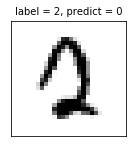

In [23]:
# 顯示預測錯誤的數字，實際是2，預測為0，由圖片可得知，字跡較潦草，確實辨別不易
plot_images(test_image, test_target_column, prediction, idx=1678)

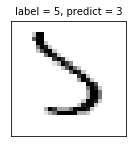

In [24]:
# 預測錯誤的數字，實際是5，預測為3，由圖片可得知，字跡較潦草，確實辨別不易
plot_images(test_image, test_target_column, prediction, idx=1393)

# 結論：
        以MLP進行手寫辨識，預測精準度：97.69%。字跡過於潦草則辨識不易。
        MLP有其限制，後續將使用CNN進一步提升精準度。